In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

Cloning into 'ds-assets'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 205 (delta 54), reused 50 (delta 50), pack-reused 147 (from 1)
Receiving objects: 100% (205/205), 12.58 MiB | 6.97 MiB/s, done.
Resolving deltas: 100% (80/80), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(home+"wdbc.csv")
df.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,3,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,5,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
features_df = df.drop(['ID','Diagnosis'],axis=1)
features_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
target_df = pd.DataFrame(df['Diagnosis'])
target_df.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [6]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

[Ellipsis]

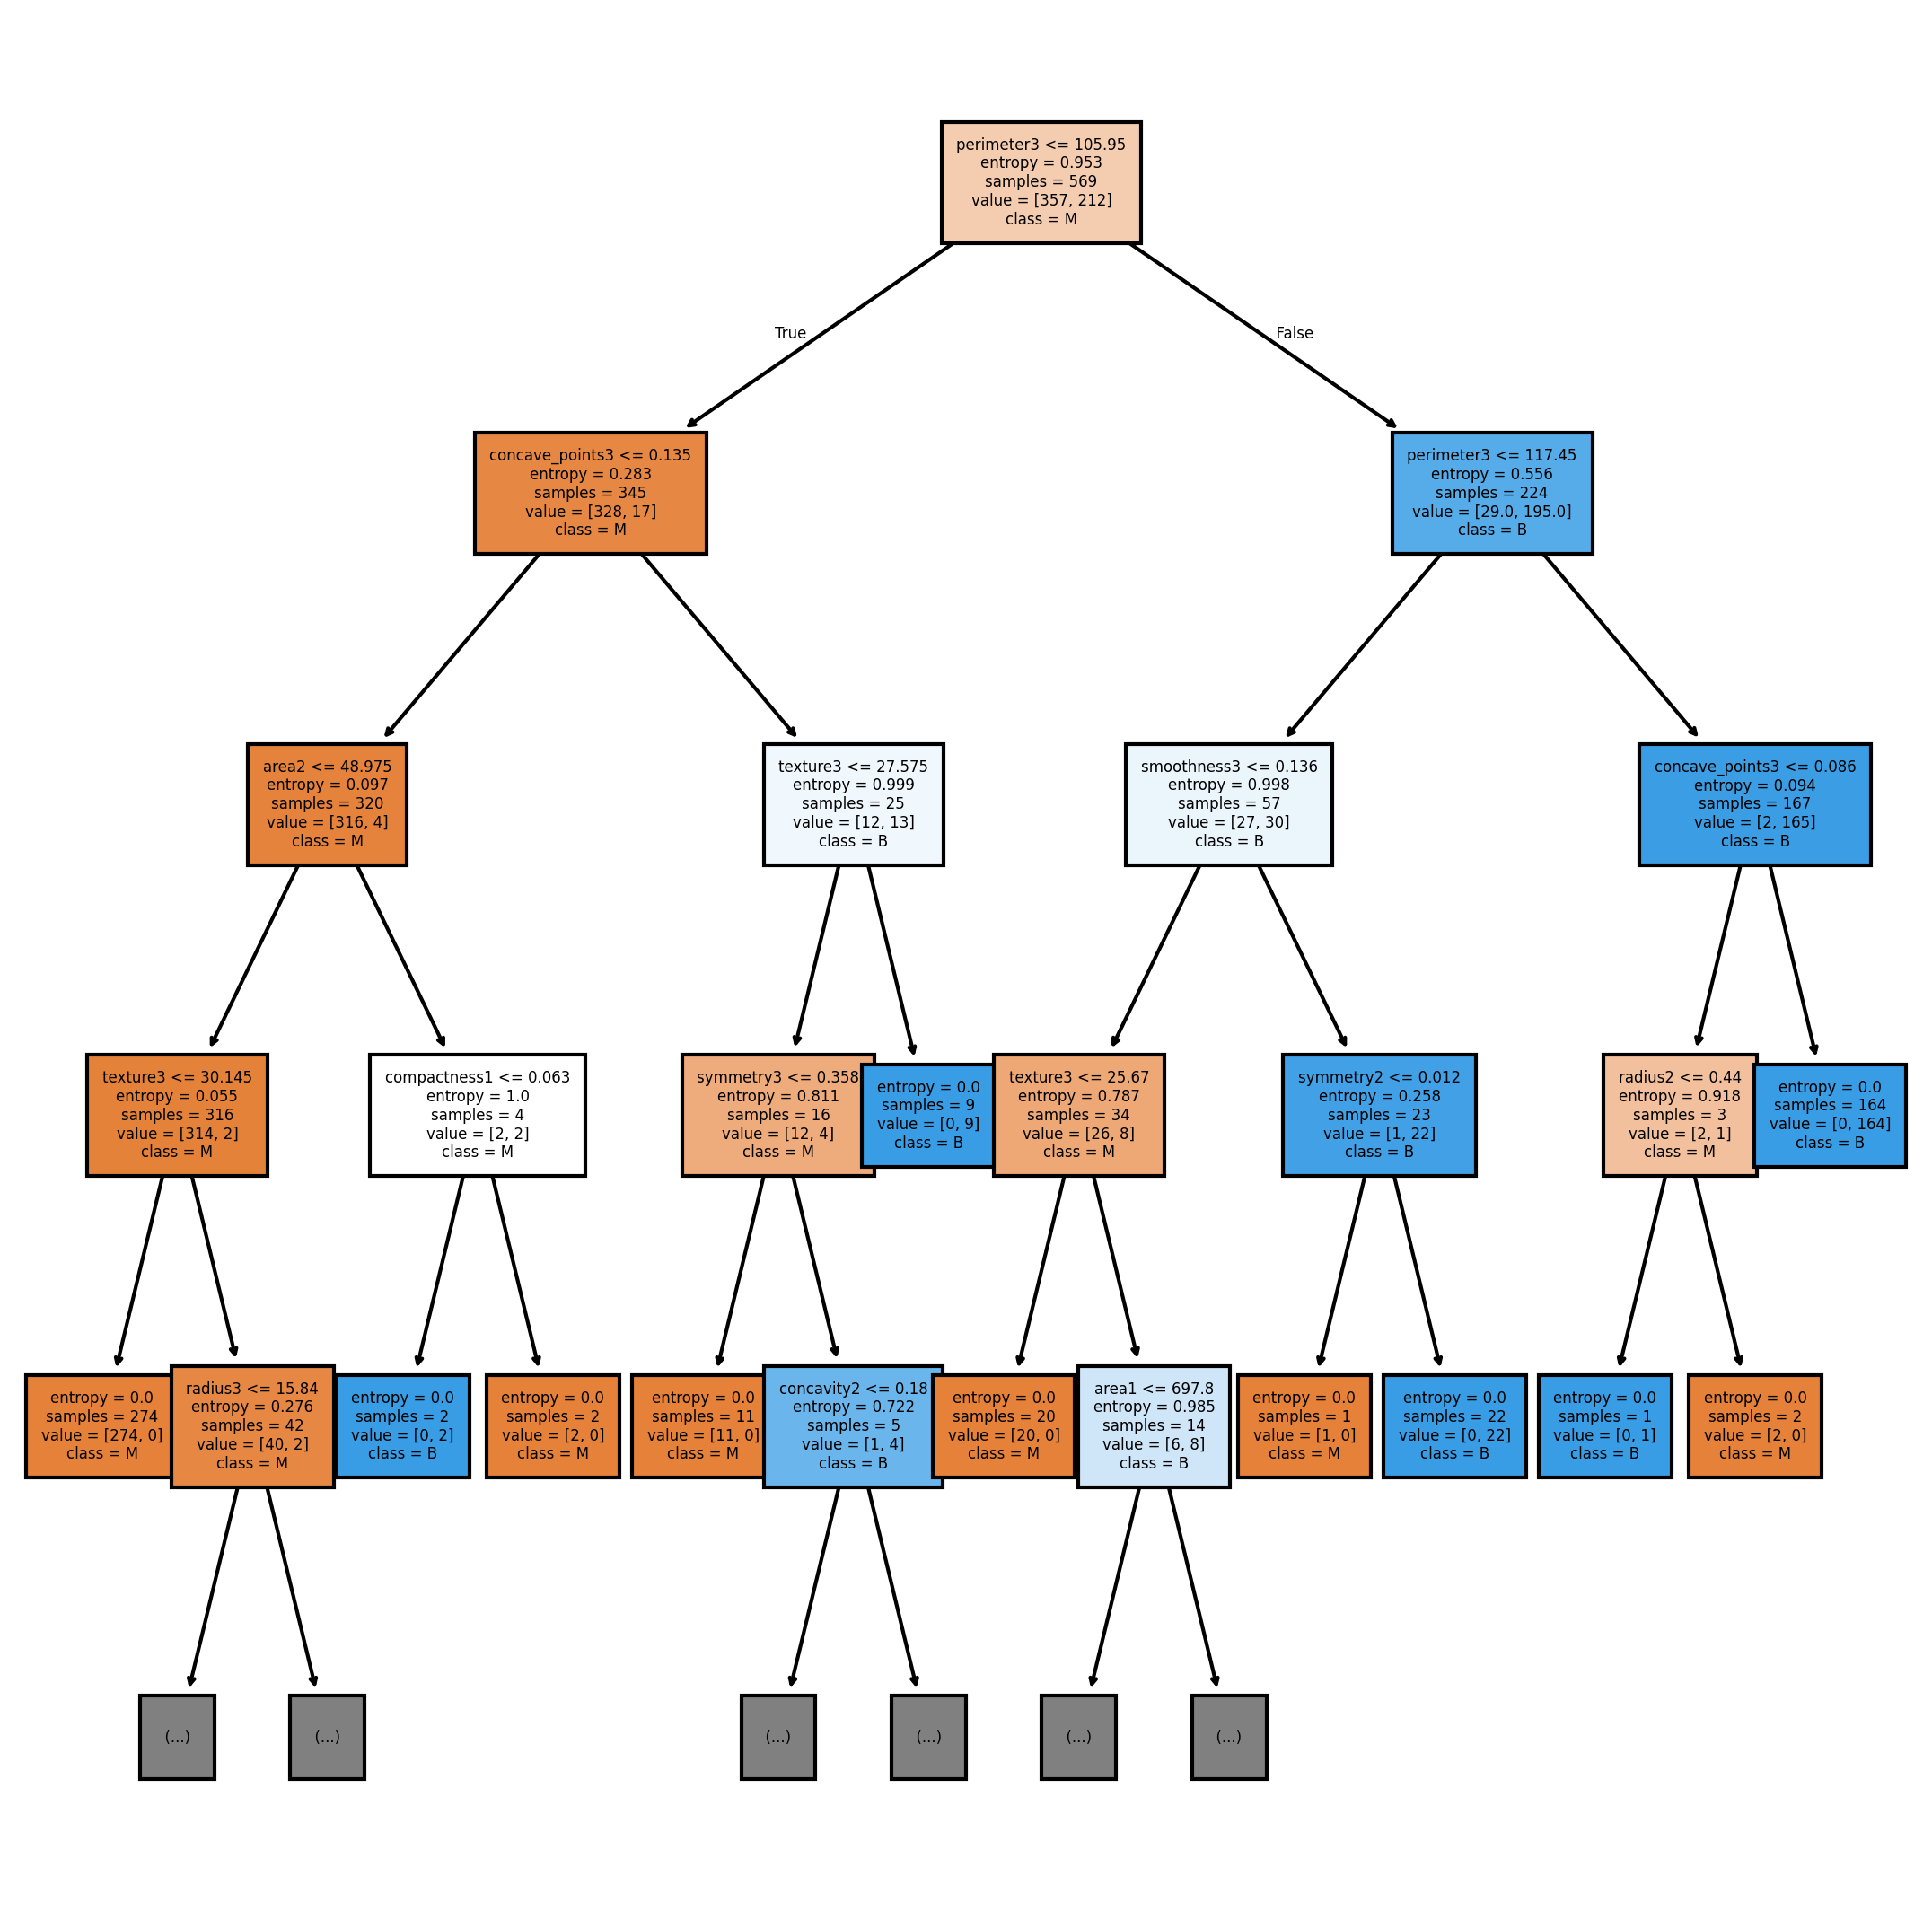

In [7]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['Diagnosis'].unique()))
[...]

In [8]:
predict_array = dtree.predict(features_df)
predicted_labels = pd.DataFrame(predict_array)
predicted_labels.columns = ['Diagnosis']

In [9]:
predicted_labels.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [10]:
target_df.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


**This helps show that I can relate the patterns my model uncovered back to the data**

In [11]:
predicted_labels.equals(target_df)

True

**Showing how accurate my model is**

In [12]:
from sklearn.metrics import accuracy_score

print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 1.0


In [13]:
dtree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree2.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [14]:
tree_print(dtree2,features_df)

if perimeter3 =< 105.95000076293945: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then B
  |  |else M
  |else if perimeter3 =< 117.44999694824219: 
  |  |then M
  |  |else M
<---->
Tree Depth:  2


[Ellipsis]

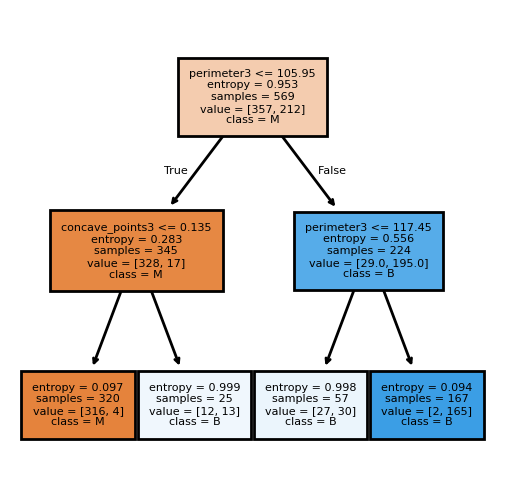

In [15]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=200)
plot_tree(dtree2, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['Diagnosis'].unique()))
[...]

**Restricting the complexity of my model to obtain very readable and understandable models without sacrificing a lot of accuracy**

In [16]:
predict_array2 = dtree2.predict(features_df)
predicted_labels2 = pd.DataFrame(predict_array2)
predicted_labels2.columns = ['play']

print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels2)))

Our model accuracy is: 0.9209138840070299


In [17]:
import pandas as pd
# Compare the predicted labels with the actual target labels
comparison_df = pd.concat([target_df, predicted_labels], axis=1)
comparison_df.columns = ['Actual Play', 'Predicted Play']

print(comparison_df)

# Checking where the cases where the prediction is incorrect
incorrect_predictions = comparison_df[comparison_df['Actual Play'] != comparison_df['Predicted Play']]

if not incorrect_predictions.empty:
  print("\nIncorrect Predictions:")
  print(incorrect_predictions)

else:
  print("\nNo incorrect predictions found.")


    Actual Play Predicted Play
0             M              M
1             M              M
2             M              M
3             M              M
4             M              M
..          ...            ...
564           M              M
565           M              M
566           M              M
567           M              M
568           B              B

[569 rows x 2 columns]

No incorrect predictions found.


Question:Can you relate the patterns the model uncovered back to the data?

Answer: I can relate the patterns the model uncovered back to the data because no incorrect predictions were found and also examining the decision tree itself and the predictions.